 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [131]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [132]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [133]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [134]:
# Drop nulls
whale_df = whale_df.dropna()
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [135]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [136]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [137]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [138]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [139]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [140]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [141]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [142]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [143]:
sp500_df.isnull().sum()

Close    1
dtype: int64

In [144]:
# Drop nulls
sp500_df = sp500_df.dropna()
sp500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [145]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [146]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={
    'Close': 'S&P500'
})
sp500_df

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


## Combine Whale, Algorithmic, and S&P 500 Returns

In [147]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


In [148]:
combined_df.sort_index()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

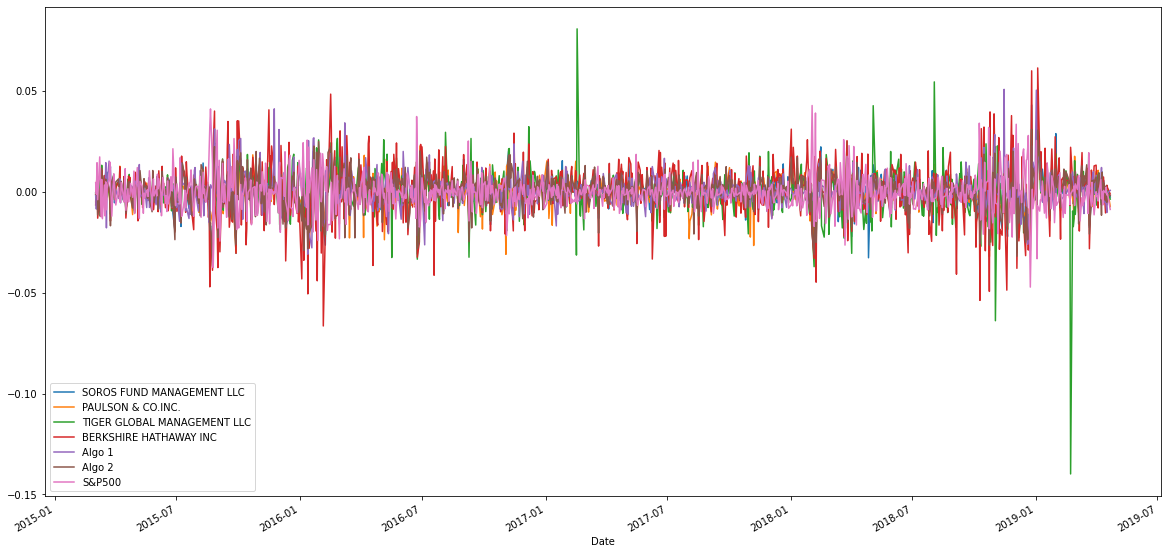

In [162]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10));
plt.savefig("Images/DailyReturns.png")

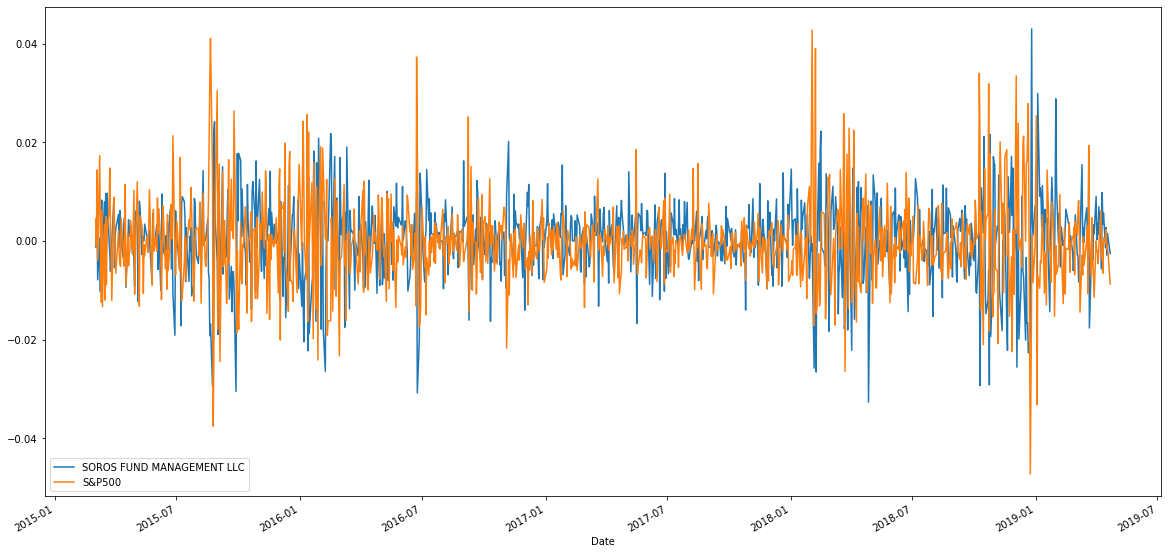

In [163]:
# SOROS vs S&P500
SOROS_sp500 = combined_df[['SOROS FUND MANAGEMENT LLC', 'S&P500']]
SOROS_sp500.plot(figsize = (20,10));
plt.savefig("Images/SorosVsSP500.png")

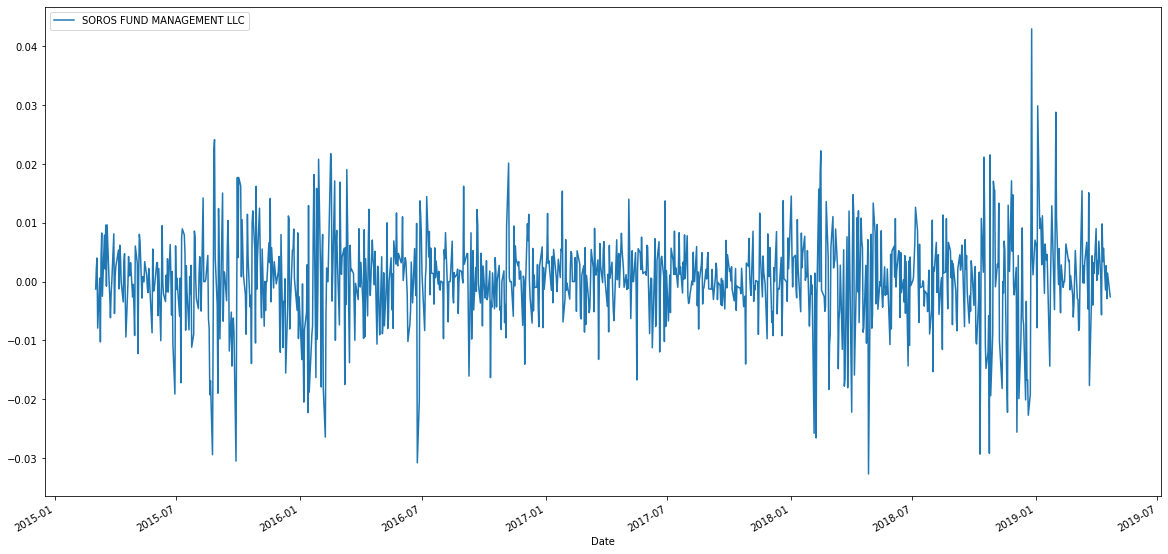

In [164]:
# SOROS Daily Returns
SOROS = combined_df['SOROS FUND MANAGEMENT LLC']
SOROS.plot(figsize = (20,10), legend=True);
plt.savefig("Images/SorosDailyReturns.png")

#### Calculate and Plot cumulative returns.

In [ ]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

In [152]:
# Grabbing SOROS Daily Returns
SOROS = combined_df['SOROS FUND MANAGEMENT LLC']
SOROS

Date
2015-03-03   -0.001266
2015-03-04    0.002230
2015-03-05    0.004016
2015-03-06   -0.007905
2015-03-09    0.000582
                ...   
2019-04-15   -0.001422
2019-04-16    0.002699
2019-04-17   -0.002897
2019-04-18    0.001448
2019-04-22   -0.002586
Name: SOROS FUND MANAGEMENT LLC, Length: 1042, dtype: float64

In [153]:
# Running cumprod (cumulative product) function over SOROS Daily Returns to calculate overall gain / loss
SOROS_cumprod = (1 + SOROS).cumprod()
SOROS_cumprod

Date
2015-03-03    0.998734
2015-03-04    1.000962
2015-03-05    1.004981
2015-03-06    0.997037
2015-03-09    0.997617
                ...   
2019-04-15    1.157839
2019-04-16    1.160965
2019-04-17    1.157602
2019-04-18    1.159278
2019-04-22    1.156280
Name: SOROS FUND MANAGEMENT LLC, Length: 1042, dtype: float64

In [154]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
SOROS_profit = initial_investment * SOROS_cumprod
# SOROS_ending_balance = SOROS_profit.loc['2019-04-22']
SOROS_ending_balance = SOROS_profit.iloc[-1]
SOROS_ending_balance.round().astype(int)

11563

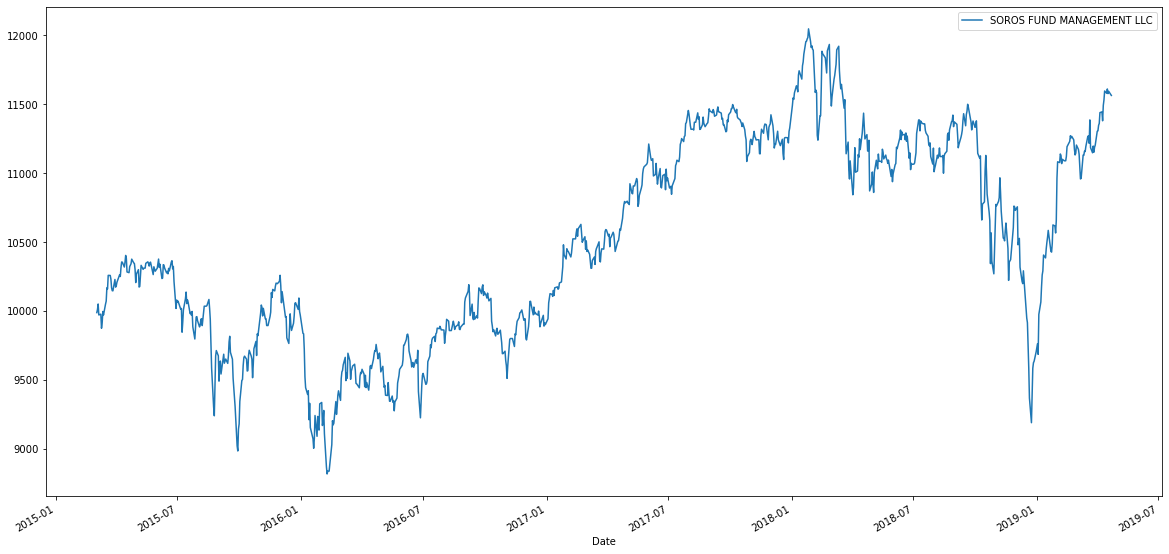

In [165]:
# Plot performance and save to Images
SOROS_profit.plot(figsize=(20,10), legend=True);
plt.savefig("Images/SorosCumulativeReturns.png")

In [156]:
# Grabbing PAULSON Daily Returns
PAULSON = combined_df['PAULSON & CO.INC. ']
PAULSON

Date
2015-03-03   -0.004981
2015-03-04    0.003241
2015-03-05    0.004076
2015-03-06   -0.003574
2015-03-09    0.004225
                ...   
2019-04-15   -0.001156
2019-04-16    0.000388
2019-04-17   -0.006467
2019-04-18    0.001222
2019-04-22   -0.007333
Name: PAULSON & CO.INC. , Length: 1042, dtype: float64

In [157]:
# Running cumprod (cumulative product) function over PAULSON Daily Returns to calculate overall gain / loss
PAULSON_cumprod = (1 + PAULSON).cumprod()
PAULSON_cumprod

Date
2015-03-03    0.995019
2015-03-04    0.998245
2015-03-05    1.002314
2015-03-06    0.998731
2015-03-09    1.002951
                ...   
2019-04-15    0.786506
2019-04-16    0.786811
2019-04-17    0.781723
2019-04-18    0.782678
2019-04-22    0.776939
Name: PAULSON & CO.INC. , Length: 1042, dtype: float64

In [158]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
PAULSON_profit = initial_investment * PAULSON_cumprod
PAULSON_ending_balance = PAULSON_profit.iloc[-1]
PAULSON_ending_balance.round().astype(int)

7769

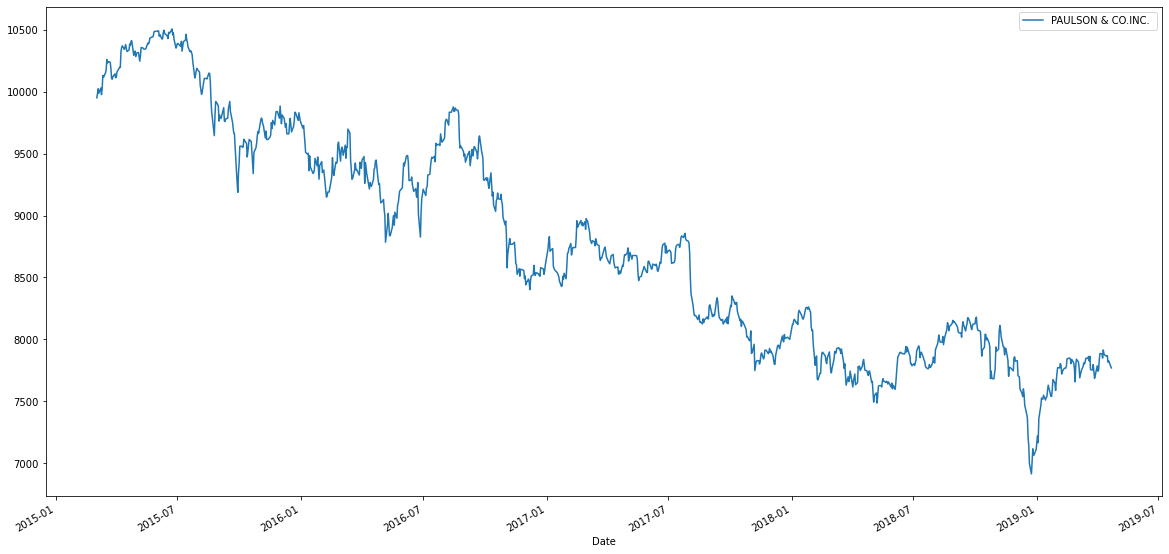

In [166]:
# Plot performance and save to Images
PAULSON_profit.plot(figsize=(20,10), legend=True);
plt.savefig("Images/PaulsonCumulativeReturns.png")

In [168]:
# Grabbing TIGER Daily Returns
TIGER = combined_df['TIGER GLOBAL MANAGEMENT LLC']
TIGER

Date
2015-03-03   -0.000496
2015-03-04   -0.002534
2015-03-05    0.002355
2015-03-06   -0.008481
2015-03-09    0.005843
                ...   
2019-04-15    0.000398
2019-04-16   -0.000831
2019-04-17   -0.004409
2019-04-18    0.000582
2019-04-22   -0.003640
Name: TIGER GLOBAL MANAGEMENT LLC, Length: 1042, dtype: float64

In [169]:
# Running cumprod (cumulative product) function over TIGER Daily Returns to calculate overall gain / loss
TIGER_cumprod = (1 + TIGER).cumprod()
TIGER_cumprod

Date
2015-03-03    0.999504
2015-03-04    0.996972
2015-03-05    0.999319
2015-03-06    0.990844
2015-03-09    0.996633
                ...   
2019-04-15    0.862797
2019-04-16    0.862080
2019-04-17    0.858279
2019-04-18    0.858778
2019-04-22    0.855652
Name: TIGER GLOBAL MANAGEMENT LLC, Length: 1042, dtype: float64

In [170]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
TIGER_profit = initial_investment * TIGER_cumprod
TIGER_ending_balance = TIGER_profit.iloc[-1]
TIGER_ending_balance.round().astype(int)

8557

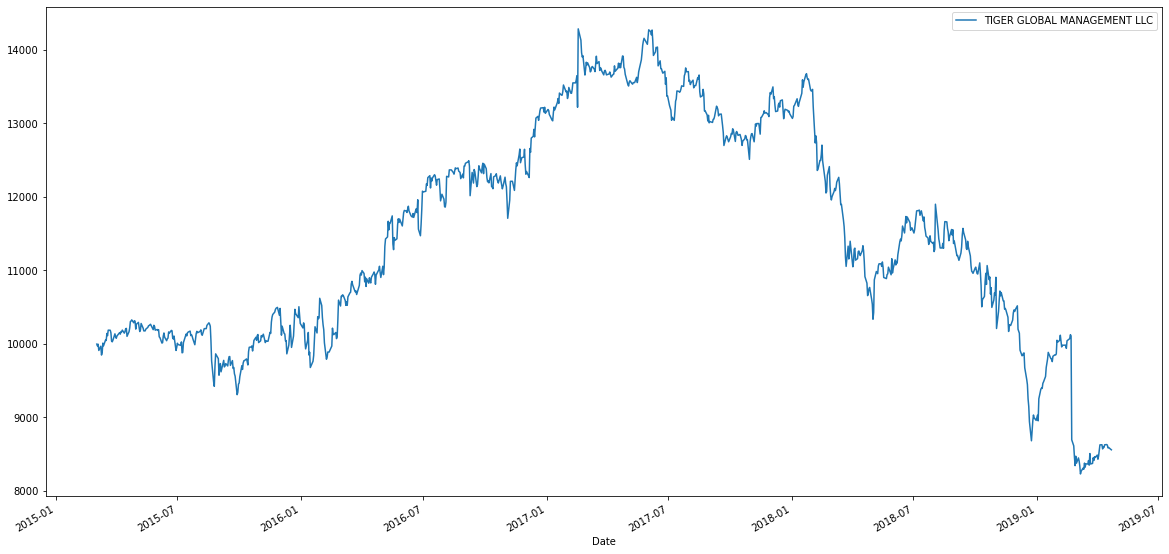

In [171]:
# Plot performance and save to Images
TIGER_profit.plot(figsize=(20,10), legend=True);
plt.savefig("Images/TigerCumulativeReturns.png")

In [173]:
# Grabbing BRK Daily Returns
BRK = combined_df['BERKSHIRE HATHAWAY INC']
BRK

Date
2015-03-03   -0.006569
2015-03-04    0.004213
2015-03-05    0.006726
2015-03-06   -0.013098
2015-03-09   -0.001652
                ...   
2019-04-15   -0.010492
2019-04-16    0.000837
2019-04-17    0.003222
2019-04-18    0.001916
2019-04-22   -0.001088
Name: BERKSHIRE HATHAWAY INC, Length: 1042, dtype: float64

In [174]:
# Running cumprod (cumulative product) function over BRK Daily Returns to calculate overall gain / loss
BRK_cumprod = (1 + BRK).cumprod()
BRK_cumprod

Date
2015-03-03    0.993431
2015-03-04    0.997617
2015-03-05    1.004327
2015-03-06    0.991172
2015-03-09    0.989534
                ...   
2019-04-15    1.525584
2019-04-16    1.526861
2019-04-17    1.531781
2019-04-18    1.534716
2019-04-22    1.533046
Name: BERKSHIRE HATHAWAY INC, Length: 1042, dtype: float64

In [175]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
BRK_profit = initial_investment * BRK_cumprod
BRK_ending_balance = BRK_profit.iloc[-1]
BRK_ending_balance.round().astype(int)

15330

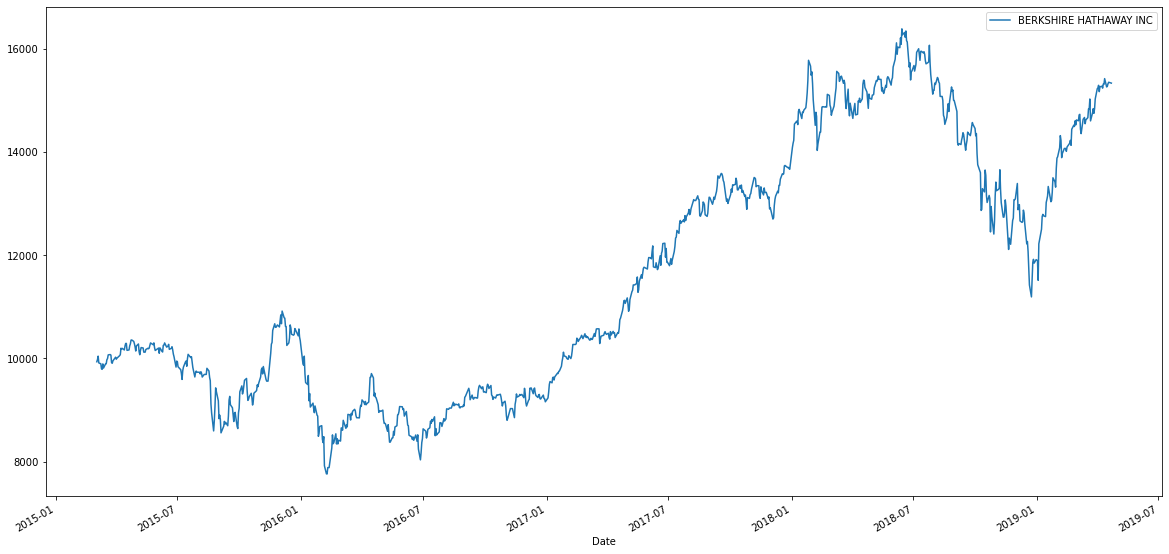

In [176]:
# Plot performance and save to Images
BRK_profit.plot(figsize=(20,10), legend=True);
plt.savefig("Images/BerkshireCumulativeReturns.png")

In [178]:
# Grabbing Algo 1 Daily Returns
Algo1 = combined_df['Algo 1']
Algo1

Date
2015-03-03   -0.001942
2015-03-04   -0.008589
2015-03-05   -0.000955
2015-03-06   -0.004957
2015-03-09   -0.005447
                ...   
2019-04-15   -0.004331
2019-04-16   -0.006945
2019-04-17   -0.010301
2019-04-18   -0.000588
2019-04-22    0.000677
Name: Algo 1, Length: 1042, dtype: float64

In [179]:
# Running cumprod (cumulative product) function over BRK Daily Returns to calculate overall gain / loss
Algo1_cumprod = (1 + Algo1).cumprod()
Algo1_cumprod

Date
2015-03-03    0.998058
2015-03-04    0.989486
2015-03-05    0.988541
2015-03-06    0.983641
2015-03-09    0.978283
                ...   
2019-04-15    1.958591
2019-04-16    1.944990
2019-04-17    1.924954
2019-04-18    1.923823
2019-04-22    1.925124
Name: Algo 1, Length: 1042, dtype: float64

In [180]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
Algo1_profit = initial_investment * Algo1_cumprod
Algo1_ending_balance = Algo1_profit.iloc[-1]
Algo1_ending_balance.round().astype(int)

19251

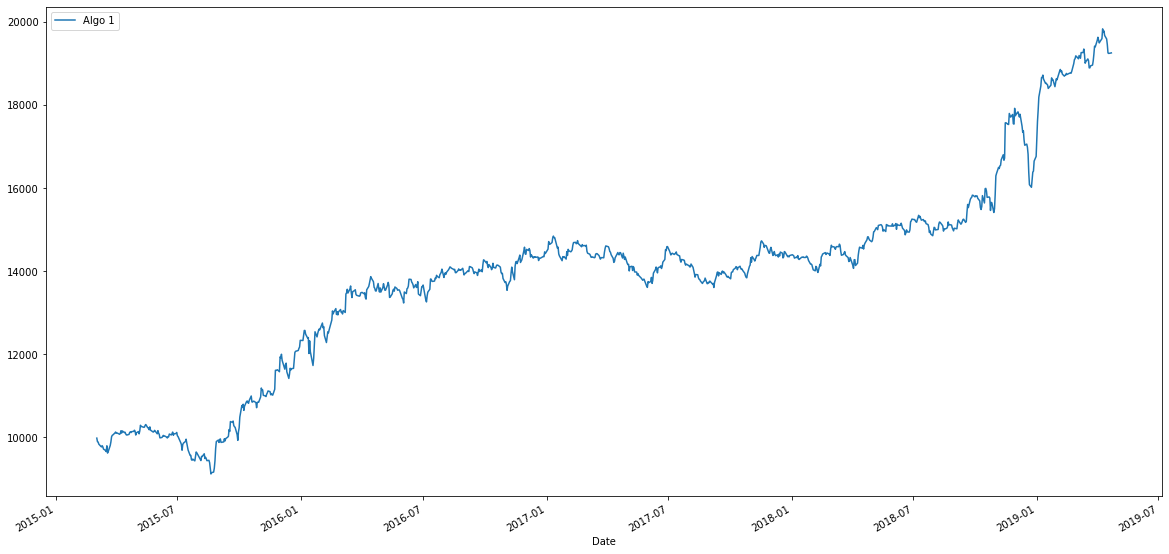

In [181]:
# Plot performance and save to Images
Algo1_profit.plot(figsize=(20,10), legend=True);
plt.savefig("Images/Algo1CumulativeReturns.png")

In [182]:
# Grabbing Algo 2 Daily Returns
Algo2 = combined_df['Algo 2']
Algo2

Date
2015-03-03   -0.000949
2015-03-04    0.002416
2015-03-05    0.004323
2015-03-06   -0.011460
2015-03-09    0.001303
                ...   
2019-04-15   -0.004572
2019-04-16    0.002899
2019-04-17   -0.005228
2019-04-18   -0.001229
2019-04-22   -0.001936
Name: Algo 2, Length: 1042, dtype: float64

In [183]:
# Running cumprod (cumulative product) function over BRK Daily Returns to calculate overall gain / loss
Algo2_cumprod = (1 + Algo2).cumprod()
Algo2_cumprod

Date
2015-03-03    0.999051
2015-03-04    1.001464
2015-03-05    1.005794
2015-03-06    0.994267
2015-03-09    0.995563
                ...   
2019-04-15    1.264103
2019-04-16    1.267768
2019-04-17    1.261140
2019-04-18    1.259590
2019-04-22    1.257151
Name: Algo 2, Length: 1042, dtype: float64

In [ ]:
# Running cumulative return against initial investment to obtain current market value of investment
initial_investment = 10000
Algo2_profit = initial_investment * Algo2_cumprod
Algo2_ending_balance = Algo2_profit.iloc[-1]
Algo2_ending_balance.round().astype(int)

In [ ]:
# Plot performance and save to Images
Algo1_profit.plot(figsize=(20,10), legend=True);
plt.savefig("Images/Algo1CumulativeReturns.png")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [ ]:
# Box plot to visually show risk


### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios


### Determine which portfolios are riskier than the S&P 500

In [ ]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!